# Imports

In [1]:
import matplotlib.pyplot as plt
import json
import seaborn as sns
from matplotlib.gridspec import GridSpec
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
def load_model_metrics(mamba_dir='mamba_checkpoints', cnn_dir='cnn_checkpoints'):
    """Load metrics from both model JSON files using correct paths."""
    try:
        with open(f'{mamba_dir}/training_metrics.json', 'r') as f:
            mamba_metrics = json.load(f)
        with open(f'{cnn_dir}/training_metrics.json', 'r') as f:
            cnn_metrics = json.load(f)
    except FileNotFoundError as e:
        print(f"Error loading metrics: {e}")
        print("Please ensure the metrics files exist in the correct directories:")
        print(f"- {mamba_dir}/training_metrics.json")
        print(f"- {cnn_dir}/training_metrics.json")
        raise

    return mamba_metrics, cnn_metrics

# Comparing the models
Comparing the metrics that were tracked during training in the traininc_metrics.json

In [18]:
def plot_metrics_comparison(mamba_dir='mamba_checkpoints',
                          cnn_dir='cnn_checkpoints',
                          save_path=None):
    """Plot comparison of model metrics from training."""

    # Load metrics
    mamba_metrics, cnn_metrics = load_model_metrics(mamba_dir, cnn_dir)

    # Create figure with subplots
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

    # Calculate epochs - each checkpoint is taken every 100 epochs
    checkpoint_freq = 100
    mamba_epochs = list(range(checkpoint_freq, len(mamba_metrics['train_accuracies']) * checkpoint_freq + 1, checkpoint_freq))
    cnn_epochs = list(range(checkpoint_freq, len(cnn_metrics['train_accuracies']) * checkpoint_freq + 1, checkpoint_freq))

    final_mamba_epoch = mamba_epochs[-1] if mamba_epochs else 0
    final_cnn_epoch = cnn_epochs[-1] if cnn_epochs else 0

    print(f"Plotting metrics - MAMBA up to epoch {final_mamba_epoch}, CNN up to epoch {final_cnn_epoch}")

    # Adjust fontsize for better readability
    plt.rcParams.update({'font.size': 12})

    # 1. Accuracy Comparison
    ax1.plot(mamba_epochs, mamba_metrics['train_accuracies'], 'b-', label='MAMBA Train')
    ax1.plot(mamba_epochs, mamba_metrics['test_accuracies'], 'b--', label='MAMBA Test')
    ax1.plot(cnn_epochs, cnn_metrics['train_accuracies'], 'r-', label='CNN Train')
    ax1.plot(cnn_epochs, cnn_metrics['test_accuracies'], 'r--', label='CNN Test')
    ax1.set_title('Accuracy Comparison')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy (%)')
    ax1.legend()
    ax1.grid(True)
    ax1.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x/100)}'))

    # 2. Loss Comparison
    ax2.plot(mamba_epochs, mamba_metrics['train_losses'], 'b-', label='MAMBA Train')
    ax2.plot(mamba_epochs, mamba_metrics['test_losses'], 'b--', label='MAMBA Test')
    ax2.plot(cnn_epochs, cnn_metrics['train_losses'], 'r-', label='CNN Train')
    ax2.plot(cnn_epochs, cnn_metrics['test_losses'], 'r--', label='CNN Test')
    ax2.set_title('Loss Comparison')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.legend()
    ax2.grid(True)
    ax2.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x/100)}'))

    # 3. Average Confidence
    ax3.plot(mamba_epochs, mamba_metrics['train_confidences'], 'b-', label='MAMBA Train')
    ax3.plot(mamba_epochs, mamba_metrics['test_confidences'], 'b--', label='MAMBA Test')
    ax3.plot(cnn_epochs, cnn_metrics['train_confidences'], 'r-', label='CNN Train')
    ax3.plot(cnn_epochs, cnn_metrics['test_confidences'], 'r--', label='CNN Test')
    ax3.set_title('Average Confidence')
    ax3.set_xlabel('Epochs')
    ax3.set_ylabel('Confidence')
    ax3.legend()
    ax3.grid(True)
    ax3.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x/100)}'))

    # 4. Overfitting Analysis (Train-Test Accuracy Gap)
    mamba_gap = [train - test for train, test in
                 zip(mamba_metrics['train_accuracies'], mamba_metrics['test_accuracies'])]
    cnn_gap = [train - test for train, test in
               zip(cnn_metrics['train_accuracies'], cnn_metrics['test_accuracies'])]

    ax4.plot(mamba_epochs, mamba_gap, 'b-', label='MAMBA')
    ax4.plot(cnn_epochs, cnn_gap, 'r-', label='CNN')
    ax4.set_title('Overfitting Analysis (Train-Test Accuracy Gap)')
    ax4.set_xlabel('Epochs')
    ax4.set_ylabel('Accuracy Gap (%)')
    ax4.legend()
    ax4.grid(True)
    ax4.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x/100)}'))

    plt.tight_layout()

    if save_path:
        plt.savefig(save_path)

    # Print summary statistics for final checkpoints
    print("\nFinal Checkpoint Statistics:")
    print("="*50)

    if len(mamba_metrics['train_accuracies']) > 0:
        print(f"\nMAMBA Final Checkpoint (Epoch {final_mamba_epoch}):")
        print(f"Accuracies - Train: {mamba_metrics['train_accuracies'][-1]:.2f}%, Test: {mamba_metrics['test_accuracies'][-1]:.2f}%")
        print(f"Overfitting Gap: {mamba_gap[-1]:.2f}%")
        print(f"Confidence - Train: {mamba_metrics['train_confidences'][-1]:.4f}, Test: {mamba_metrics['test_confidences'][-1]:.4f}")

    if len(cnn_metrics['train_accuracies']) > 0:
        print(f"\nCNN Final Checkpoint (Epoch {final_cnn_epoch}):")
        print(f"Accuracies - Train: {cnn_metrics['train_accuracies'][-1]:.2f}%, Test: {cnn_metrics['test_accuracies'][-1]:.2f}%")
        print(f"Overfitting Gap: {cnn_gap[-1]:.2f}%")
        print(f"Confidence - Train: {cnn_metrics['train_confidences'][-1]:.4f}, Test: {cnn_metrics['test_confidences'][-1]:.4f}")

    return fig, (mamba_metrics, cnn_metrics)

Plotting metrics - MAMBA up to epoch 70000, CNN up to epoch 60000

Final Checkpoint Statistics:

MAMBA Final Checkpoint (Epoch 70000):
Accuracies - Train: 98.97%, Test: 79.23%
Overfitting Gap: 19.74%
Confidence - Train: 0.9942, Test: 0.9703

CNN Final Checkpoint (Epoch 60000):
Accuracies - Train: 77.90%, Test: 69.69%
Overfitting Gap: 8.21%
Confidence - Train: 0.7188, Test: 0.7172


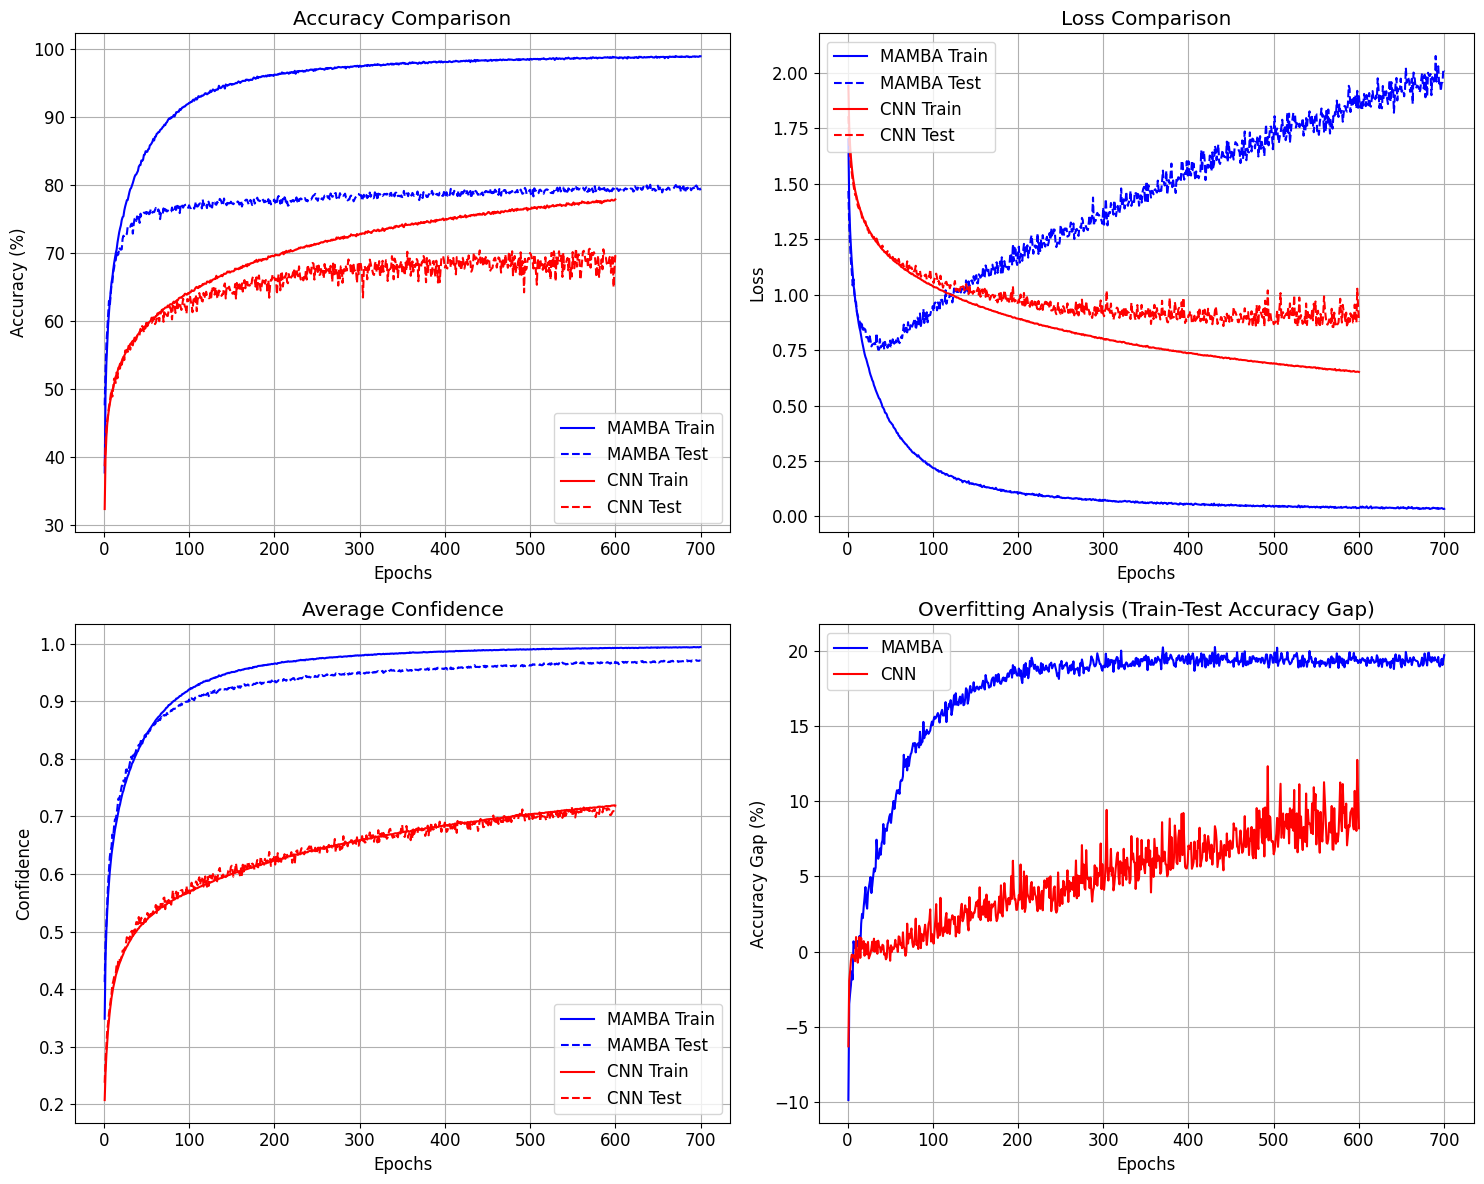

In [19]:
fig, (mamba_metrics, cnn_metrics) = plot_metrics_comparison(
    mamba_dir='/content/drive/MyDrive/mamba_checkpoints'  ,
    cnn_dir='/content/drive/MyDrive/cnn_checkpoints',
    save_path='model_comparison.png'
)

plt.show()